# Preprocessing


In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
# Import and read the american_bankruptcy.csv.

url = "https://raw.githubusercontent.com/jannatulhashi/American_Company_Bankruptcy_Prediction/main/american_bankruptcy.csv"
bankruptcy_df = pd.read_csv(url)
bankruptcy_df.head()


,company_name,status_label,year,current_assets(X1),cost_of_goods_sold(X2),depreciation_and_amortization(X3),EBITDA(X4),inventory(X5),net_income(X6),total_receivables(X7),...,net_sales(X9),total_assets(X10),total_long_term_debt(X11),EBIT(X12),gross_profit(X13),total_current_liabilities(X14),retained_earnings(X15),total_revenue(X16),total_liabilities(X17),total_operating_expenses(X18)
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


### Variable Name Description

**X1 :** Current assets - All the assets of a company that are expected to be sold or used as a result of standard business operations over the next year

**X2 :** Cost of goods sold - The total amount a company paid as a cost directly related to the sale of products

**X3 :** Depreciation and amortization - Depreciation refers to the loss of value of a tangible fixed asset over
time (such as property, machinery, buildings, and plant). Amortization refers to the loss of value of intangible assets over time.

**X4 :** EBITDA - Earnings before interest, taxes, depreciation, and amortization. It is a measure of a company's overall financial performance, serving as an alternative to net income.

**X5 :** Inventory - The accounting of items and raw materials that a company either uses in production or sells.

**X6 :** Net Income - The overall profitability of a company after all expenses and costs have been deducted from total revenue.

**X7 :** Total Receivables - The balance of money due to a firm for goods or services delivered or used but not yet paid for by customers.

**X8 :** Market value - The price of an asset in a marketplace. In this dataset, it refers to the market capitalization since companies are publicly traded in the stock market.

**X9 :** Net sales - The sum of a company's gross sales minus its returns, allowances, and discounts.

**X10 :** Total assets - All the assets, or items of value, a business owns.

**X11 :** Total Long-term debt - A company's loans and other liabilities that will not become due within one year of the balance sheet date.

**X12 :** EBIT - Earnings before interest and taxes.

**X13 :** Gross Profit - The profit a business makes after subtracting all the costs that are related to manufacturing and selling its products or services.

**X14 :** Total Current Liabilities - The sum of accounts payable, accrued liabilities, and taxes such as Bonds payable at the end of the year, salaries, and commissions remaining.

**X15 :** Retained Earnings - The amount of profit a company has left over after paying all its direct costs, indirect costs, income taxes, and its dividends to shareholders.

**X16 :** Total Revenue - The amount of income that a business has made from all sales before subtracting expenses. It may include interest and dividends from investments.

**X17 :** Total Liabilities - The combined debts and obligations that the company owes to outside parties.

**X18 :** Total Operating Expenses - The expenses a business incurs through its normal business operations.

In [3]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   company_name                       78682 non-null  object 
 1   status_label                       78682 non-null  object 
 2   year                               78682 non-null  int64  
 3   current_assets(X1)                 78682 non-null  float64
 4   cost_of_goods_sold(X2)             78682 non-null  float64
 5   depreciation_and_amortization(X3)  78682 non-null  float64
 6   EBITDA(X4)                         78682 non-null  float64
 7   inventory(X5)                      78682 non-null  float64
 8   net_income(X6)                     78682 non-null  float64
 9   total_receivables(X7)              78682 non-null  float64
 10  market_value(X8)                   78682 non-null  float64
 11  net_sales(X9)                      78682 non-null  flo

In [ ]:
# Determine the number of unique values in each column.
bankruptcy_df.nunique()

company_name                          8971
status_label                             2
year                                    20
current_assets(X1)                   65895
cost_of_goods_sold(X2)               65690
depreciation_and_amortization(X3)    36010
EBITDA(X4)                           59060
inventory(X5)                        38898
net_income(X6)                       55550
total_receivables(X7)                49577
market_value(X8)                     77580
net_sales(X9)                        68596
total_assets(X10)                    71521
total_long_term_debt(X11)            39741
EBIT(X12)                            56949
gross_profit(X13)                    64952
total_current_liabilities(X14)       58685
retained_earnings(X15)               72062
total_revenue(X16)                   68596
total_liabilities(X17)               64640
total_operating_expenses(X18)        70840
dtype: int64

In [ ]:
# Verify missing values
missing_values = bankruptcy_df.isnull().sum()
print(missing_values)

company_name                         0
status_label                         0
year                                 0
current_assets(X1)                   0
cost_of_goods_sold(X2)               0
depreciation_and_amortization(X3)    0
EBITDA(X4)                           0
inventory(X5)                        0
net_income(X6)                       0
total_receivables(X7)                0
market_value(X8)                     0
net_sales(X9)                        0
total_assets(X10)                    0
total_long_term_debt(X11)            0
EBIT(X12)                            0
gross_profit(X13)                    0
total_current_liabilities(X14)       0
retained_earnings(X15)               0
total_revenue(X16)                   0
total_liabilities(X17)               0
total_operating_expenses(X18)        0
dtype: int64


In [4]:
# Look at company_name value counts for binning

company_name_counts = bankruptcy_df["company_name"].value_counts()
company_name_counts

C_4081    20
C_6487    20
C_1153    20
C_4047    20
C_4056    20
          ..
C_1498     1
C_5908     1
C_2814     1
C_3997     1
C_3408     1
Name: company_name, Length: 8971, dtype: int64

In [5]:
# Choose a cutoff value and create a list of company_name to be replaced and  use the variable name `company_name_to_replace`

cutoff_value = 100
company_name_to_replace = company_name_counts[company_name_counts < cutoff_value].index.tolist()

# Replace in dataframe
for name in company_name_to_replace:
    bankruptcy_df['company_name'] =  bankruptcy_df['company_name'].replace(name, "other")

# Check to make sure binning was successful
bankruptcy_df['company_name'].value_counts()

other    78682
Name: company_name, dtype: int64

In [6]:
# Apply one-hot encoding to the `company_name`

bankruptcy_df = pd.get_dummies(bankruptcy_df, columns=['company_name'])


In [7]:
# Convert the status_label column to binary numeric values, with 'alive' represented as 1 and 'failed' as 0
bankruptcy_df['status_label'] = bankruptcy_df['status_label'].apply(lambda x: 1 if x == 'alive' else 0)


In [8]:
bankruptcy_df.head()

,status_label,year,current_assets(X1),cost_of_goods_sold(X2),depreciation_and_amortization(X3),EBITDA(X4),inventory(X5),net_income(X6),total_receivables(X7),market_value(X8),...,total_assets(X10),total_long_term_debt(X11),EBIT(X12),gross_profit(X13),total_current_liabilities(X14),retained_earnings(X15),total_revenue(X16),total_liabilities(X17),total_operating_expenses(X18),company_name_other
0,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,...,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1
1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,...,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,1
2,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,...,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,1
3,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,...,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,1
4,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,...,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,1


Here,
'company_name' represents the name of the company. We've applied binning and one-hot encoding to this column to reduce the number of unique values and transform it into a format suitable for modeling.

'status_label', the target variable of the data set.

'year', the column to split the data into training, test and verification sets.

'X1' - 'X18', the 18 predictor variables.

In [10]:
# Split our preprocessed data into our features and target arrays
X = bankruptcy_df.drop(columns='status_label', axis=1)
y = bankruptcy_df["status_label"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Create a sequential model
nn = tf.keras.models.Sequential()

# Input Layer
nn.add(tf.keras.layers.Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))

# First Hidden Layer
nn.add(tf.keras.layers.Dense(units=64, activation='relu'))

# Second Hidden Layer
nn.add(tf.keras.layers.Dense(units=32, activation='relu'))

# Third Hidden layer
nn.add(tf.keras.layers.Dense(units=16, activation='relu'))

# Output Layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2688      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13569 (53.00 KB)
Trainable params: 13569 (53.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
1672/1672 [==============================] - 8s 4ms/step - loss: 0.2357 - accuracy: 0.9344 - val_loss: 0.2294 - val_accuracy: 0.9325
Epoch 2/100
1672/1672 [==============================] - 6s 4ms/step - loss: 0.2256 - accuracy: 0.9343 - val_loss: 0.2275 - val_accuracy: 0.9323
Epoch 3/100
1672/1672 [==============================] - 5s 3ms/step - loss: 0.2222 - accuracy: 0.9345 - val_loss: 0.2251 - val_accuracy: 0.9332
Epoch 4/100
1672/1672 [==============================] - 5s 3ms/step - loss: 0.2198 - accuracy: 0.9348 - val_loss: 0.2293 - val_accuracy: 0.9333
Epoch 5/100
1672/1672 [==============================] - 6s 4ms/step - loss: 0.2170 - accuracy: 0.9353 - val_loss: 0.2225 - val_accuracy: 0.9329
Epoch 6/100
1672/1672 [==============================] - 5s 3ms/step - loss: 0.2155 - accuracy: 0.9354 - val_loss: 0.2217 - val_accuracy: 0.9335
Epoch 7/100
1672/1672 [==============================] - 6s 4ms/step - loss: 0.2151 - accuracy: 0.9356 - val_loss: 0.2198 - val_ac

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

492/492 - 1s - loss: 0.2438 - accuracy: 0.9361 - 951ms/epoch - 2ms/step
Loss: 0.24375776946544647, Accuracy: 0.9360741972923279


In [ ]:
# Save and export the results to an HDF5 file
# Export model to HDF5 File

from google.colab import files

nn.save('/content/american_company_bankruptcy.h5')
files.download('/content/american_company_bankruptcy.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Predicting Non-Bankrupt Companies Analysis:

**Overview of the Analysis:**

The primary goal of this analysis is to create a robust model capable of identifying companies that are not at risk of bankruptcy. We will achieve this by utilizing a range of financial metrics and attributes, harnessing deep learning techniques. This model will empower stakeholders to assess the financial stability of companies and make informed decisions.

#### Results:
**Data Preprocessing:**

**Target Variable(s) for the Model:**

**status_label:** This binary variable indicates whether a company is 'alive' or 'failed'.

**Features for the Model:**

Financial metrics such as:

- Current assets (X1)

- Cost of goods sold (X2)

- Depreciation and amortization (X3)

- EBITDA (X4)

- Inventory (X5)

- Net Income (X6)

- Total Receivables (X7)

- Market value (X8)

- Net sales (X9)

- Total assets (X10)

- Total Long-term debt (X11)

- EBIT (X12)

- Total Current Liabilities (X13)

- Retained Earnings (X14)

- Total Revenue (X15)

- Total Liabilities (X16)

- Total Operating Expenses (X18).

**One-hot encoded "company_name".**

**Variables to be Removed:**

The original **"company_name"** column, as it was transformed into a one-hot encoded format.

**Compiling, Training, and Evaluating the Model:**

**Neural Network Architecture:**
Number of Layers: 5 (1 Input, 3 Hidden, 1 Output)

**Neurons:**

- Input layer: 128 neurons

- First hidden layer: 64 neurons

- Second hidden layer: 32 neurons

- Third hidden layer: 16 neurons

- Output layer: 1 neuron

**Activation Functions:**
- 'relu' for input and hidden layers.
- 'sigmoid' for the output layer.

**Reason for Architecture Choice:**

The choice of neurons and layers was based on the complexity of the dataset. The 'relu' activation function is commonly used in hidden layers because of its efficiency and non-linearity. The 'sigmoid' activation function is suitable for the binary classification task at hand.

**Model Performance:**

- Loss: 0.24375776946544647
- Accuracy: 93.6%

**Steps to Increase Model Performance:**

The data was scaled using **StandardScaler**.
One-hot encoding was applied to categorical variables.
The dataset was split into training and testing subsets to evaluate model performance on unseen data.

**Summary:**

The deep learning model developed for predicting non-bankruptcy events has shown promising results, with an accuracy rate of approximately 93.6%. The model utilized various financial metrics as features and underwent preprocessing steps such as scaling and one-hot encoding for categorical variables.

**Recommendations:**

While our deep learning model has shown notable success, introducing ensemble techniques, such as Random Forest, could further enhance its accuracy. Ensemble methods often provide robust predictions by combining multiple models' outputs. Moreover, techniques like feature importance from ensemble methods can offer insights into which financial metrics are most predictive of not going bankrupt.

In [ ]:
import os
# spark_version = 'spark-3.4.1'
spark_version = 'spark-3.4.1'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,347 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,269 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 2,958 kB in 2s (1,343 kB/s)
Reading package li

After assessing the model's accuracy, PySpark SQL was integrated to delve deeper into the main dataframe **bankruptcy_df**. The use of PySpark provides scalable and efficient data exploration, allowing for a thorough understanding of underlying trends and patterns. This PySpark SQL offered a platform to derive insights from the data, complementing the model's findings and potentially guiding further refinements.

In [ ]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("BankruptcyAnalysis").getOrCreate()
spark_df = spark.createDataFrame(bankruptcy_df)

# Show DataFrame
spark_df.show()


+------------+----+------------------+----------------------+---------------------------------+----------+-------------+--------------+---------------------+----------------+-------------+-----------------+-------------------------+---------+-----------------+------------------------------+----------------------+------------------+----------------------+-----------------------------+------------------+
|status_label|year|current_assets(X1)|cost_of_goods_sold(X2)|depreciation_and_amortization(X3)|EBITDA(X4)|inventory(X5)|net_income(X6)|total_receivables(X7)|market_value(X8)|net_sales(X9)|total_assets(X10)|total_long_term_debt(X11)|EBIT(X12)|gross_profit(X13)|total_current_liabilities(X14)|retained_earnings(X15)|total_revenue(X16)|total_liabilities(X17)|total_operating_expenses(X18)|company_name_other|
+------------+----+------------------+----------------------+---------------------------------+----------+-------------+--------------+---------------------+----------------+-------------+

In [ ]:
# Create a temporary view of the DataFrame.

spark_df.createOrReplaceTempView('company_bankruptcy')

In [ ]:
# How many companies go bankrupt  each year?

spark.sql("""SELECT year, COUNT(*) as num_bankruptcies_companies
             FROM company_bankruptcy
             WHERE status_label = 0
             GROUP BY year
             ORDER BY year""").show()


+----+--------------------------+
|year|num_bankruptcies_companies|
+----+--------------------------+
|1999|                       380|
|2000|                       404|
|2001|                       414|
|2002|                       414|
|2003|                       415|
|2004|                       404|
|2005|                       379|
|2006|                       366|
|2007|                       336|
|2008|                       284|
|2009|                       234|
|2010|                       218|
|2011|                       194|
|2012|                       182|
|2013|                       167|
|2014|                       142|
|2015|                       111|
|2016|                        83|
|2017|                        57|
|2018|                        36|
+----+--------------------------+



In [ ]:
# How many companies remain alive each year?

spark.sql("""SELECT year, COUNT(*) AS num_alive_companies
             FROM company_bankruptcy
             WHERE status_label = 1
             GROUP BY year
             ORDER BY year""").show()


+----+-------------------+
|year|num_alive_companies|
+----+-------------------+
|1999|               4928|
|2000|               4822|
|2001|               4483|
|2002|               4237|
|2003|               4002|
|2004|               3944|
|2005|               3826|
|2006|               3762|
|2007|               3673|
|2008|               3573|
|2009|               3509|
|2010|               3407|
|2011|               3319|
|2012|               3303|
|2013|               3317|
|2014|               3362|
|2015|               3243|
|2016|               3108|
|2017|               2957|
|2018|               2687|
+----+-------------------+



In [ ]:
# Which year had the highest number of bankruptcies?

spark.sql("""SELECT year, COUNT(*) as num_bankruptcies
             FROM company_bankruptcy
             WHERE status_label = 0
             GROUP BY year
             ORDER BY num_bankruptcies DESC
             LIMIT 15""").show()

+----+----------------+
|year|num_bankruptcies|
+----+----------------+
|2003|             415|
|2002|             414|
|2001|             414|
|2004|             404|
|2000|             404|
|1999|             380|
|2005|             379|
|2006|             366|
|2007|             336|
|2008|             284|
|2009|             234|
|2010|             218|
|2011|             194|
|2012|             182|
|2013|             167|
+----+----------------+



In [ ]:
# What's the average value of each predictor variable (X1 - X18) for "alive" companies?
spark.sql("""SELECT
    AVG(`current_assets(X1)`) as avg_X1,
    AVG(`cost_of_goods_sold(X2)`) as avg_X2,
    AVG(`depreciation_and_amortization(X3)`) as avg_X3,
    AVG(`EBITDA(X4)`) as avg_X4,
    AVG(`inventory(X5)`) as avg_X5,
    AVG(`net_income(X6)`) as avg_X6,
    AVG(`total_receivables(X7)`) as avg_X7,
    AVG(`market_value(X8)`) as avg_X8,
    AVG(`net_sales(X9)`) as avg_X9,
    AVG(`total_assets(X10)`) as avg_X10,
    AVG(`total_long_term_debt(X11)`) as avg_X11,
    AVG(`EBIT(X12)`) as avg_X12,
    AVG(`gross_profit(X13)`) as avg_X13,
    AVG(`total_current_liabilities(X14)`) as avg_X14,
    AVG(`retained_earnings(X15)`) as avg_X15,
    AVG(`total_revenue(X16)`) as avg_X16,
    AVG(`total_liabilities(X17)`) as avg_X17,
    AVG(`total_operating_expenses(X18)`) as avg_X18
FROM company_bankruptcy
WHERE status_label = 1""").show()



+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+
|           avg_X1|            avg_X2|            avg_X3|           avg_X4|           avg_X5|            avg_X6|            avg_X7|            avg_X8|           avg_X9|          avg_X10|          avg_X11|          avg_X12|          avg_X13|          avg_X14|          avg_X15|          avg_X16|           avg_X17|           avg_X18|
+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------------+------------------+
|

These average values, which cover diverse financial metrics from asset management to profitability indicators, consistently show positive signs. They support the notion that the "alive" companies in this dataset are indeed financially sound, profitable, and efficiently operated.Having a clear grasp of the financial metrics and their implications on a company's health allows for a more informed, accurate, and interpretable bankruptcy prediction model.

In [ ]:
# What's the average value of each predictor variable (X1 - X18) for "failed" companies?
spark.sql("""SELECT
    AVG(`current_assets(X1)`) as avg_X1,
    AVG(`cost_of_goods_sold(X2)`) as avg_X2,
    AVG(`depreciation_and_amortization(X3)`) as avg_X3,
    AVG(`EBITDA(X4)`) as avg_X4,
    AVG(`inventory(X5)`) as avg_X5,
    AVG(`net_income(X6)`) as avg_X6,
    AVG(`total_receivables(X7)`) as avg_X7,
    AVG(`market_value(X8)`) as avg_X8,
    AVG(`net_sales(X9)`) as avg_X9,
    AVG(`total_assets(X10)`) as avg_X10,
    AVG(`total_long_term_debt(X11)`) as avg_X11,
    AVG(`EBIT(X12)`) as avg_X12,
    AVG(`gross_profit(X13)`) as avg_X13,
    AVG(`total_current_liabilities(X14)`) as avg_X14,
    AVG(`retained_earnings(X15)`) as avg_X15,
    AVG(`total_revenue(X16)`) as avg_X16,
    AVG(`total_liabilities(X17)`) as avg_X17,
    AVG(`total_operating_expenses(X18)`) as avg_X18
    FROM company_bankruptcy
    WHERE status_label = 0""").show()

+-----------------+----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+------------------+
|           avg_X1|          avg_X2|           avg_X3|           avg_X4|           avg_X5|            avg_X6|            avg_X7|           avg_X8|            avg_X9|           avg_X10|          avg_X11|          avg_X12|          avg_X13|           avg_X14|            avg_X15|           avg_X16|           avg_X17|           avg_X18|
+-----------------+----------------+-----------------+-----------------+-----------------+------------------+------------------+-----------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-------------------+------------------+------------------+---------------

From the provided data on "failed" companies:

**Operational Losses:** A negative net income (avg_X6) suggests these companies consistently operated at a loss.

**Limited Financial Buffer:** Lower total assets (avg_X10) and a relatively high long-term debt (avg_X11) indicate financial vulnerability and potential liquidity issues.

**Revenue vs. Debt:** Despite generating revenue (avg_X9), these companies had considerable debt (avg_X11 and avg_X14), hinting at possible financial mismanagement or overwhelming expenses.

In summary, "failed" companies in this dataset exhibited consistent operational losses, had limited assets to cover liabilities, and faced significant financial challenges.

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

import pydotplus
from IPython.display import Image

In [ ]:
# Identify the variables

X.head()
X.tail()
y.head()
y.tail()

78677    1
78678    1
78679    1
78680    1
78681    1
Name: status_label, dtype: int64

In [ ]:
# Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
# Identify the Logistic Regression
classifier = LogisticRegression(solver='lbfgs', random_state=1)

classifier

LogisticRegression(random_state=1)

In [ ]:
# Train the data
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

# Score the model

# Score the model on the training data
training_score = classifier.score(X_train, y_train)
print(f"Training Data Score: {training_score}")


testing_score = classifier.score(X_test, y_test)
print(f"Testing Data Score: {testing_score}")


Training Data Score: 0.9341011994598459
Testing Data Score: 0.932198004702294


In [ ]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
58332,1,1
66075,1,1
77412,1,1
57137,1,0
9134,1,1
...,...,...
6939,1,1
11833,1,1
54981,1,1
48107,1,1


In [ ]:
# Calculate the accuracy score
# Display the test score

accuracy_score(y_test, predictions)

0.932198004702294

# Classification


In [ ]:
bankruptcy_df.head()

,status_label,year,current_assets(X1),cost_of_goods_sold(X2),depreciation_and_amortization(X3),EBITDA(X4),inventory(X5),net_income(X6),total_receivables(X7),market_value(X8),...,total_assets(X10),total_long_term_debt(X11),EBIT(X12),gross_profit(X13),total_current_liabilities(X14),retained_earnings(X15),total_revenue(X16),total_liabilities(X17),total_operating_expenses(X18),company_name_other
0,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,...,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,1
1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,...,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888,1
2,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,...,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514,1
3,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,...,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592,1
4,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,...,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467,1


In [ ]:
# Split tbe data into X (features) and y (target)
y = bankruptcy_df["status_label"]
X = bankruptcy_df.drop(columns=["status_label"])

In [ ]:
# Split into training and testing set using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# Fit a logistic resgression classifier
bankruptcy_logistic_regression_model = LogisticRegression(random_state=6)

In [ ]:
# Fit and save logistic regression model using the training data
lgr_model = bankruptcy_logistic_regression_model.fit(X_train, y_train)

In [ ]:
# Generate training predictions
training_predictions = lgr_model.predict(X_train)

# Generate testing predictions
testing_predictions = bankruptcy_logistic_regression_model.predict(X_test)

# Confusion Matrix


In [ ]:
# Import the model for sklearn confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the labels for the training data
training_predictions = classifier.predict(X_train)

# Create and save the confusion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

print(training_matrix)




[[   32  4120]
 [   28 58765]]


In [ ]:
# Create and save confusion matrix for testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print test matrix
print(test_matrix)


[[    7  1061]
 [    6 14663]]


In [ ]:
# Create training classification report
training_report = classification_report(y_train, training_predictions)

print(training_report)

              precision    recall  f1-score   support

           0       0.53      0.01      0.02      4152
           1       0.93      1.00      0.97     58793

    accuracy                           0.93     62945
   macro avg       0.73      0.50      0.49     62945
weighted avg       0.91      0.93      0.90     62945



In [ ]:
# Create testing classification report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)

              precision    recall  f1-score   support

           0       0.54      0.01      0.01      1068
           1       0.93      1.00      0.96     14669

    accuracy                           0.93     15737
   macro avg       0.74      0.50      0.49     15737
weighted avg       0.91      0.93      0.90     15737



Analysis of Classification

How well does the performance of the  training and test dataset compare?

Answer: When it comes to Active companies, there is a 93% success rate, meanwhile for the failed companies there is only a 59% success rate. There is a lot of unpredictability within the "failed" companies. There could also be external factors as to why a companies goes bankrupt.  

## **RANDOM FOREST**

In [ ]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [ ]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [ ]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## **Fitting the Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=90)

## **Making Predictions using the Random Forest Model**

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
### **Fitting the Random Forest Model** Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## **Model Evaluation**

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)## **Fitting the Random Forest Model**

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,63,1005
Actual 1,3,14666


Accuracy Score : 0.9359471309652412
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.06      0.11      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.94     15737
   macro avg       0.95      0.53      0.54     15737
weighted avg       0.94      0.94      0.91     15737



## **Feature Importance**

In [ ]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.06661144818132533, 'market_value(X8)'),
 (0.062167026497089085, 'retained_earnings(X15)'),
 (0.05931395062269325, 'depreciation_and_amortization(X3)'),
 (0.05581841703947242, 'current_assets(X1)'),
 (0.05579151630646992, 'total_receivables(X7)'),
 (0.05554869665656981, 'total_liabilities(X17)'),
 (0.055058414454891215, 'gross_profit(X13)'),
 (0.0550260690333301, 'net_income(X6)'),
 (0.05345641555791437, 'total_assets(X10)'),
 (0.05216742241297801, 'total_current_liabilities(X14)'),
 (0.050782515647405095, 'total_long_term_debt(X11)'),
 (0.050133611670399314, 'cost_of_goods_sold(X2)'),
 (0.04993605822946846, 'inventory(X5)'),
 (0.04984864502122528, 'EBITDA(X4)'),
 (0.04969708787083925, 'EBIT(X12)'),
 (0.04840991931463265, 'total_operating_expenses(X18)'),
 (0.04534873721710354, 'net_sales(X9)'),
 (0.04527885191371612, 'total_revenue(X16)'),
 (0.03960519635247667, 'year'),
 (0.0, 'company_name_other')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

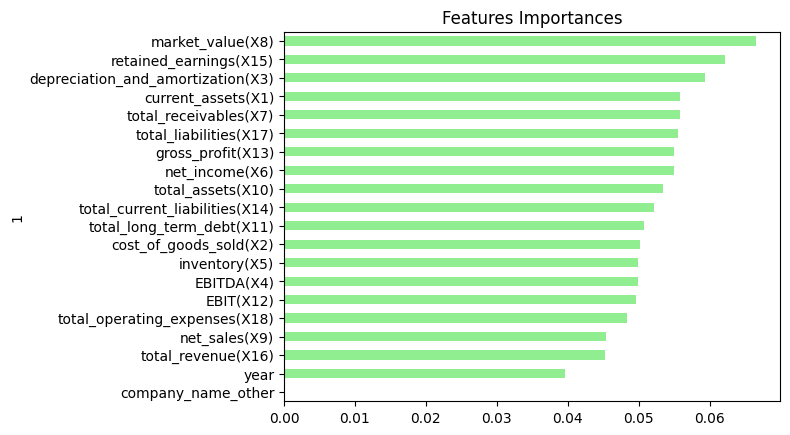

In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Gradient Boosting

In [11]:
import xgboost as xgb
from sklearn.metrics import classification_report

# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters


param = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',        # Logarithmic loss metric
    'scale_pos_weight': sum(y_train==0) / sum(y_train==1),  # Handle class imbalance
    'max_depth': 6,                  # Max depth of the trees
    'eta': 0.3,                      # Learning rate
}

# Training the model
num_round = 100  # Number of boosting rounds
bst = xgb.train(param, dtrain, num_round)
# Predictions for training data
train_preds_prob = bst.predict(dtrain)
train_preds_binary = [1 if p > 0.5 else 0 for p in train_preds_prob]

# Predictions for test data (you've done this part already)
test_preds_prob = bst.predict(dtest)
test_preds_binary = [1 if p > 0.5 else 0 for p in test_preds_prob]

# Evaluate model's performance on training data
print("Performance on Training Data:")
print(classification_report(y_train, train_preds_binary))

# Evaluate model's performance on test data
print("\nPerformance on Test Data:")
print(classification_report(y_test, test_preds_binary))

Performance on Training Data:
              precision    recall  f1-score   support

           0       0.35      0.96      0.51      4152
           1       1.00      0.87      0.93     58793

    accuracy                           0.88     62945
   macro avg       0.67      0.92      0.72     62945
weighted avg       0.95      0.88      0.90     62945


Performance on Test Data:
              precision    recall  f1-score   support

           0       0.23      0.64      0.34      1068
           1       0.97      0.85      0.91     14669

    accuracy                           0.83     15737
   macro avg       0.60      0.74      0.62     15737
weighted avg       0.92      0.83      0.87     15737



# Analysis:

In this model, the training data exhibits a high accuracy of 88%, and recall of 87% for companies that are not at risk (Class 1). This indicates the model's adeptness in pinpointing a significant majority of solvent companies during its training phase.

When tested on unseen data, the model still maintains robustness, securing an 83% accuracy rate and an 85% recall for non-risk companies. Such consistency between training and testing phases underlines the model's capability to generalize well, minimizing the likelihood of making false negative predictions—i.e., mistakenly labeling a solvent company as at risk.

Considering our project's prime focus, this model offers a dependable framework to accurately distinguish companies not at risk of bankruptcy, observing closely to the set objectives and metrics set out in our goal.

# Limitations:

**Imbalanced Dataset:**

Our dataset predominantly consists of non-bankrupt companies, with only a few data points for bankrupt entities. This imbalance can skew the model's predictive capabilities.

**Insufficient Features:**

The current set of input features might not be comprehensive enough. Exclusively relying on the provided financial metrics might miss out on other vital bankruptcy indicators.To predict more accurately, we need to gather additional data or metrics that can contribute to recognizing the non-bankrupt nature of companies.